# Wrangle and Analyze Data: WeRateDogs

## Project Outline:

**1. Data wrangling:**
- Gathering data
- Assessing data
- Cleaning data

**2. Storing, analyzing, and visualizing your wrangled data**

**3. Reporting**

## Introduction:

In this project, we are going to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it anf finally act on it through analysis, visualization and/or modeling using Python (and its libraries) and/or SQL.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user **@dog_rates**, also known as **WeRateDogs**. 

**WeRateDogs** is a **Twitter account** that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The **Twitter archive** of WeRateDogs contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. Of the 5000+ tweets, we have filtered for tweets with ratings only because not all 5000+ tweets are dog ratings and some are retweets. So there are about 2356 tweets.

The data was extracted programmatically from each tweet's text, but the ratings as well as dog names and dog stages probably aren't all correct. So, we'll need to assess and clean these columns in order to use them for analysis and visualization.
There is also additional data, which include retweet count and favorite count, can be also gathered programmatically from **Twitter's API** using **Tweepy Library in Python**

After having ran every image in the **WeRateDogs Twitter archive** through a **neural network** that can classify breeds of dogs, the output is a table full of **image predictions** (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Our next step is that all of this additional data will need to be gathered, assessed, and cleaned.

## Step 1. Gathering Data:

The first step in our data wrangling process is gathering data from several different sources and file formats such as: 
- The WeRateDogs Twitter Archive, which is a cvs file that contains the tweet for each dog's name, its rating and stage.
- The Tweet Image Prediction, which is what breed of dog is in each tweet according to a neural network.
- The Twitter's API and JSON data, which will be used to gather retweet count and favorite count ( two missing columns in the Twitter Archive).  

In [2]:
#Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
import json 
import time
import datetime

### 1. The WeRateDogs Twitter Archive:

In [3]:
# Display WeRateDogs Twitter Archive
twitter_arch = pd.read_csv('C:\\Users\\Pattu\\OneDrive\\Documents\\06. Udacity.Data Analyst\\03. Data Wrangling\\05. Wrangle and Analyze Data\\twitter-archive-enhanced-2.csv')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_arch.shape

(2356, 17)

As already mentioned in the introduction, there are about 2356 tweets which represents the name of dogs, their breeds and also their ratings, etc.

### 2. The Tweet Image Prediction:

After having imported correctly the WeRateDogs Twitter Archive file into our DataFrame, we are going use **Web Scraping** to extract programmatically the **Tweet Image Prediction** which is hosted on Udacity's servers by using the **Requests and OS library** and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

The tweet image predictions represents what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 

In [5]:
# Download the Tweet image prediction file 
file_name = 'image-predictions.tsv'

if not os.path.isfile(file_name): 
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)    

In [6]:
# Save the url to the Tweet image prediction file 
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [7]:
# Display the Tweet Image Prediction
image_pred = pd.read_csv('C:\\Users\\Pattu\\OneDrive\\Documents\\06. Udacity.Data Analyst\\03. Data Wrangling\\05. Wrangle and Analyze Data\\image-predictions-3.tsv' , sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_pred.shape

(2075, 12)

### 3. The Twitter's API and JSON:

Next, we are going to use **Twitter API** to import tweets into our DataFrame.

As each tweet's retweet count and favorite ("like") count at minimum, we are going to use the **tweet IDs** in the WeRateDogs Twitter archive, and then **query the Twitter API** for each **tweet's JSON data** using **Python's Tweepy library** and finally **store each tweet's entire set of JSON data** in a file called **tweet_json.txt file**. 

The Twitter API is one that requires users to be authorized to use it. This means that before we can run your API querying code, you need to set up our own Twitter application. Once we have our Twitter account and Twitter app set up, the following code, which is provided in the Getting started portion of the Tweepy documentation, will create an API object that we can use to gather Twitter data.

In [9]:
consumer_key = '9z8ml6gwVlQwGvh0rF4RTYb73'
consumer_secret = 'kiTeQqfsc3Ln1npnbWvFGp16Pqub5x43x7FdIE7kvxBAB2D2Th'
access_token = '70109805-3BTNVw5UxCoMDmTuONLXB9BNmlISO2wIfqpaBeiwp'
access_secret = 'p017IrgoDpSK8kcPFiE2ZAr9MlqOb9lNWU75dF4t0tS4F'

In [10]:
# Query the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [11]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
list_of_tweets = []
missing_tweets = [] # list of the tweets that can't be found are saved in the list

with open ('tweet_json.txt', 'a') as file:
    for tweet_id in twitter_arch['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            start_time = time.time() # calculate the time of execution
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            list_of_tweets.append(tweet)   
            print("Success : {tweet._json.key()}"),
            # writes one tweet per line
            file.write(json.dumps(tweet) + '\n')
            end_time = time.time()
            print('ID {} . Time in seconds: {}'.format(tweet_id, end_time-start_time))
        except Exception as e_message:
            missing_tweets.append(tweet_id)
            print("Error for ID: " + str(tweet_id) + str(e_message))
    print('End reached.')

1: 892420643555336193


Rate limit reached. Sleeping for: 4


Success : {tweet._json.key()}
ID 892420643555336193 . Time in seconds: 9.363942861557007
2: 892177421306343426
Success : {tweet._json.key()}
ID 892177421306343426 . Time in seconds: 0.30275440216064453
3: 891815181378084864
Success : {tweet._json.key()}
ID 891815181378084864 . Time in seconds: 0.3033792972564697
4: 891689557279858688
Success : {tweet._json.key()}
ID 891689557279858688 . Time in seconds: 0.19989395141601562
5: 891327558926688256
Success : {tweet._json.key()}
ID 891327558926688256 . Time in seconds: 0.23434090614318848
6: 891087950875897856
Success : {tweet._json.key()}
ID 891087950875897856 . Time in seconds: 0.28782105445861816
7: 890971913173991426
Success : {tweet._json.key()}
ID 890971913173991426 . Time in seconds: 0.17389249801635742
8: 890729181411237888
Success : {tweet._json.key()}
ID 890729181411237888 . Time in seconds: 0.2018752098083496
9: 890609185150312448
Success : {tweet._json.key()}
ID 890609185150312448 . Time in seconds: 0.24741792678833008
10: 89024

Rate limit reached. Sleeping for: 669


Success : {tweet._json.key()}
ID 758740312047005698 . Time in seconds: 674.3085458278656
902: 758474966123810816
Success : {tweet._json.key()}
ID 758474966123810816 . Time in seconds: 0.18983912467956543
903: 758467244762497024
Success : {tweet._json.key()}
ID 758467244762497024 . Time in seconds: 0.2792856693267822
904: 758405701903519748
Success : {tweet._json.key()}
ID 758405701903519748 . Time in seconds: 0.2555687427520752
905: 758355060040593408
Success : {tweet._json.key()}
ID 758355060040593408 . Time in seconds: 0.2327418327331543
906: 758099635764359168
Success : {tweet._json.key()}
ID 758099635764359168 . Time in seconds: 0.23514461517333984
907: 758041019896193024
Success : {tweet._json.key()}
ID 758041019896193024 . Time in seconds: 0.19920897483825684
908: 757741869644341248
Success : {tweet._json.key()}
ID 757741869644341248 . Time in seconds: 0.2694826126098633
909: 757729163776290825
Success : {tweet._json.key()}
ID 757729163776290825 . Time in seconds: 0.2177383899688

Rate limit reached. Sleeping for: 693


Success : {tweet._json.key()}
ID 676975532580409345 . Time in seconds: 698.2369203567505
1802: 676957860086095872
Success : {tweet._json.key()}
ID 676957860086095872 . Time in seconds: 0.25810718536376953
1803: 676949632774234114
Success : {tweet._json.key()}
ID 676949632774234114 . Time in seconds: 0.24915719032287598
1804: 676948236477857792
Success : {tweet._json.key()}
ID 676948236477857792 . Time in seconds: 0.18751835823059082
1805: 676946864479084545
Success : {tweet._json.key()}
ID 676946864479084545 . Time in seconds: 0.19500017166137695
1806: 676942428000112642
Success : {tweet._json.key()}
ID 676942428000112642 . Time in seconds: 0.25438427925109863
1807: 676936541936185344
Success : {tweet._json.key()}
ID 676936541936185344 . Time in seconds: 0.3568711280822754
1808: 676916996760600576
Success : {tweet._json.key()}
ID 676916996760600576 . Time in seconds: 0.2185964584350586
1809: 676897532954456065
Success : {tweet._json.key()}
ID 676897532954456065 . Time in seconds: 0.280

In [16]:
print("The list of tweets", len(list_of_tweets))
print("The list of tweets no found", len(missing_tweets))

The list of tweets 2331
The list of tweets no found 25


In [17]:
# Create an empty list to load data line by line into it
tweet_json_list = []
with open('tweet_json.txt', 'r', encoding='utf-8') as json_file:
    for line in json_file:
        tweet_json_list.append(json.loads(line))

In [21]:
# Create a DataFrame from tweet_json_list
tweet_data = pd.DataFrame(tweet_json_list, columns =['id', 'retweet_count', 'favorite_count'])

In [109]:
# Change the name of the id column to tweet_id
tweet_data = tweet_data.rename(columns = {'id': 'tweet_id'})
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7360,35019
1,892177421306343426,5486,30332
2,891815181378084864,3628,22804
3,891689557279858688,7541,38305
4,891327558926688256,8127,36572


In [25]:
# Save the dataFrame in file
tweet_data.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [26]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              16709 non-null  int64
 1   retweet_count   16709 non-null  int64
 2   favorite_count  16709 non-null  int64
dtypes: int64(3)
memory usage: 391.7 KB


Note that each tweet's entire set of JSON data is stored in **tweet_json.txt** file, and also each tweet's JSON data is written to its own line and the **tweet_json.txt** file is read line by line into a pandas DataFrame.

After having gathered data from **twitter-archive-enhanced.csv**, and downloading **image-predictions.tsv** from internet unsing requests library and then querying an API **tweet_json.txt** using Tweepy library, we are going to start the next step in our data wrangling process which is **Assessing Data**.

## Step 2. Assessing Data:

After gathering the data, the three tables which are **twitter_archive**, **image_prediction** and **tweet_json** were saved and assessed Visually and Programmatically to identify data quality issues.

### 1. Visual assessment:

In [2146]:
# Display first 5 rows of the dataframe
twitter_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [2147]:
# Display last 5 rows of the dataframe
twitter_arch.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [2148]:
# Display the image prediction table
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [2149]:
# Display the tweet data table
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7360,35019
1,892177421306343426,5486,30332
2,891815181378084864,3628,22804
3,891689557279858688,7541,38305
4,891327558926688256,8127,36572


Through Visual Assessment, we conclude that:
- There are some quality issues such as NaN and missing values in the twitter_archive table, while in the image prediction table there are some dogs' name in lowercase and others in uppercase. 
- The column text had multiple variables like a url link, rating, and some tweets represented two dogs.
- The tweet_count and archive table should be merged as this is related data.
- There are also non-descriptive column headers and duplicates that should be documented and then cleaned.

### 2. Programmatic assessment:

#### 2.1 Twitter Archive DataFrame:

In [2150]:
# View a sample of data
twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2164,669371483794317312,NaN,NaN,2015-11-25 04:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliviér. He's a Baptist Hindquarter. Also smooth af with the babes. 10/10 I'd totally get in a car with him https://t.co/fj4c170cxk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669371483794317312/photo/1,10,10,Oliviér,None,None,None,None
33,885984800019947520,NaN,NaN,2017-07-14 22:10:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion advised. This is Jimbo. He will rip ur finger right h*ckin off. Other dog clearly an accessory. 12/10 pls pet with caution https://t.co/BuveP0uMF1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885984800019947520/photo/1,12,10,Jimbo,None,None,None,None
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Ever seen a dog pet another dog? Both 13/10 truly an awe-inspiring scene. (Vid by @mdougherty20) https://t.co/3PoKf6cw7f,NaN,NaN,NaN,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None
307,835685285446955009,NaN,NaN,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rory. He's got an interview in a few minutes. Looking spiffy af. Nervous as h*ck tho. 12/10 would hire https://t.co/…,7.869631e+17,4.196984e+09,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064373534720/photo/1,12,10,Rory,None,None,None,None
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kyle (pronounced 'Mitch'). He strives to be the best doggo he can be. 11/10 would pat on head approvingly https://t.co/aA2GiTGvlE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214819057664/photo/1,11,10,Kyle,doggo,None,None,None


In [2151]:
# View info of twitter_archive DataFrame
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- tweet_id should be object instead of dtype int64 
- timestamp should be a datetime64 dtype type as well
- dogs' stage (doggo, floofer, pupper, and puppo) should be merged into one column

In [2152]:
# View descriptive statistics of twitter_archive DataFrame
twitter_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


Note that the minimum of both rating_numerator and rating_denominator is zero, while the maximum of rating respectively is 1,776 and 170.

As WeRateDogs has ratings almost always have a denominator of 10 and the numerators almost always greater than 10. 11/10, 12/10, 13/10, etc, we are going to check which numerator has a rating less than 10 as well as which denominator has a value of 0.

In [2165]:
# Count the number of rating_numerator less than 10
twitter_arch[twitter_arch['rating_numerator']<10].count()[0]

440

In [2166]:
# Check which tweet_id have numerator less than 10
twitter_arch[twitter_arch['rating_numerator'] < 10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [2167]:
# Check which tweet_id have denominator with zero value
twitter_arch[twitter_arch['rating_denominator'] == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [2168]:
# Check their respective text
twitter_arch.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [2169]:
sum(twitter_arch.rating_denominator != 10)

23

In [2170]:
sum(twitter_arch['tweet_id'].duplicated())

0

In [2174]:
# Check for missing values
twitter_arch.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [2175]:
# View number of entries for each source
twitter_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

The source column looks messy:
- There are two variables in one column which violates the "each variable forms a column" requirement. There is "href" and also "rel" which should be split into 2 separate columns.
- The main source of twitter is iphone but the urls are not readable for human.

In [2176]:
twitter_arch['text'].value_counts()

This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10 https://t.co/85q7xlplsJ                             1
This is Peaches. She's the ultimate selfie sidekick. Super sneaky tongue slip appreciated. 13/10 https://t.co/pbKOesr8Tg                                              1
Crazy unseen footage from Jurassic Park. 10/10 for both dinosaur puppers https://t.co/L8wt2IpwxO                                                                      1
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                          1
This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu                                            1
                                                                                                                                                                

In [2177]:
twitter_arch['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1    2
https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/681523177663676416/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/809920764300447744/photo/1                                                                                                                                                          

In [2178]:
# Count the number of retweets 
twitter_arch['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [2179]:
# Check missing information for each dog stages
doggo = twitter_arch.doggo.value_counts()
floofer = twitter_arch.floofer.value_counts()
pupper = twitter_arch.pupper.value_counts()
puppo = twitter_arch.puppo.value_counts()
print(doggo); print(floofer); print(pupper); print(puppo);

None     2259
doggo    97  
Name: doggo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
None      2099
pupper    257 
Name: pupper, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64


There are missing information for each dog stages.

In [2180]:
twitter_arch.name.value_counts().head(20)

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Penny      10 
Tucker     10 
Lola       10 
Winston    9  
Bo         9  
the        8  
Sadie      8  
Daisy      7  
an         7  
Buddy      7  
Toby       7  
Bailey     7  
Oscar      6  
Jax        6  
Name: name, dtype: int64

"None" means that there are many missing names from the list, While "a", "Bo" and "an" might be the first letter of random names. 

#### 2.2 Image Prediction DataFrame:

In [2181]:
# View a sample of image_predictions DataFrame
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
111,667902449697558528,https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg,1,Norwegian_elkhound,0.298881,True,malamute,0.279479,True,Eskimo_dog,0.198428,True
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
954,705223444686888960,https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg,1,Egyptian_cat,0.090508,False,Chesapeake_Bay_retriever,0.077373,True,Mexican_hairless,0.049472,True
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


Note that the dog breed name values in the p1, p2, and p3 columns are not consistantly stored. Some name are either in lowercase or in uppercase while others have wrong name such Siamese cat, bathtub, or hamster. Some dog breed name have underscores with should be replaced with spaces for better readability.

In [2182]:
# Check if the tweet_id 740676976021798912 is for a Siamese cat
image_pred.loc[1197, 'jpg_url']

'https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg'

In [2183]:
# Check out how to get Jupyter Notebook to show images
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg') 

This is definitely a dog not a Siamese cat.

In [2184]:
# view the dimension of the dataset
image_pred.shape

(2075, 12)

In [2185]:
# Display a basic summary of the DataFrame
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- There are no missing values as all variables have 2075 records.
- The tweet_id column should be object as dtype instead of int64.

In [2186]:
# View descriptive statistics of image_predictions DataFrame
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [2187]:
# check for duplicates
sum(image_pred.jpg_url.duplicated())

66

In [2188]:
sum(image_pred['tweet_id'].value_counts())

2075

In [2189]:
image_pred['img_num'].value_counts() 

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

#### 2.3 Tweet JSON DataFrame:

In [2330]:
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
9335,848213670039564288,675,7828
12182,818627210458333184,7362,21997
744,887473957103951883,15707,62399
9400,837110210464448512,2264,15577
11299,819227688460238848,6522,22626


In [2191]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        16709 non-null  int64
 1   retweet_count   16709 non-null  int64
 2   favorite_count  16709 non-null  int64
dtypes: int64(3)
memory usage: 391.7 KB


- There are no missing values as all variables have 16709 entries.

In [2192]:
# display statistic basic summary 
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,1.670900e+04,16709.000000,16709.000000
mean,7.894257e+17,3765.159555,11176.740559
std,6.613716e+16,4944.244645,13631.613927
min,6.660209e+17,1.000000,0.000000
25%,7.508688e+17,1102.000000,1860.000000
50%,7.993088e+17,2443.000000,7606.000000
75%,8.389216e+17,4569.000000,15578.000000
max,8.924206e+17,74314.000000,150567.000000


Taking a look at the describe output for the "tweet_data" table, we conclude that there is a gap of 5,746 between 25% and 50% while it is much bigger of 7,972 between 50% and 75% which suggests that there is a **massive skew** in the distribution.

In [2193]:
# check for missing values
tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

Duplicate column names can be found more generally in Pandas, using the following code:

In [2194]:
all_columns = pd.Series(list(twitter_arch) + list(image_pred) + list(tweet_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality Issues:

**Twitter Archive Table:**
- Q 1: There are 181 retweets as indicated by retweeted status id
- Q 2: Missing values in columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, in_reply_to_user_id.
- Q 3: tweet_id should be object instead of dtype int64
- Q 4: timestamp should be a datetime64 dtype type
- Q 5: Invalide dog names: "None", "a", "an", etc
- Q 6: Innacurate ratings: The number of rating numerator less than 10 are 440; 23 rating denominators are not equal to 10; and the tweet_id 835246439529840640 has a rating denominator with zero value. In addition, some ratings with decimals have been incorrectly exported.
- Q 7: There are two variables in one column which violates the "each variable forms a column" requirement. There is "href" and also "rel" which should mention only the main source of both of them.

**Image Prediction Table:**
- Q 3: tweet_id should be object instead of dtype int64
- Q 8: Dog breed name values in the p1, p2, and p3 had some uppercase and lowercase letters.
- Q 9: Multiple columns containing the same type of data in the predictions table.
- Q 10:There are 66 jpg_url duplicates Image Predictions Table

**Tweet JASON Table:**
- Q 3: tweet_id should be object instead of dtype int64
- Q 11: There are duplicates in tweet_id in tweet_data_clean Table.

### Tidiness issues:

- T 1: Dog stage data is separated into 4 columns (doggo, floofer, pupper, and puppo) which should be merged in one column
- T 2: All 3 tables are related by a commun key "tweet_id" and shouldn't be divided into separate DataFrame
- T 3: Some additional work on our new DataFrame should be done for better redability

## Step 3. Cleaning Data:

Cleaning data is the third step in data wrangling process. We are going to fix the quality and tidiness issues that we have identified in the assess step.

In [2681]:
# Create DataFrame copies
twitter_arch_clean = twitter_arch.copy()
image_pred_clean = image_pred.copy()
tweet_data_clean = tweet_data.copy()

In [2682]:
twitter_arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [2683]:
image_pred_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [2684]:
tweet_data_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7360,35019


In [2685]:
print(twitter_arch_clean.shape)
print(image_pred_clean.shape)
print(tweet_data_clean.shape)

(2356, 17)
(2075, 12)
(16709, 3)


### 1. Cleaning for Quality:

Programmatic data cleaning as its own separate process within data wrangling has 3 steps: **defining**, **coding** and **testing**. First of all, we'll define cleaning data plan in writing, then we'll translate it into code, and finally, we'll test the dataset often using code to make sure the cleaning code worked.

**Q 1:** There are 181 retweets as indicated by retweeted status id<br>
**Define:**  Remove all retweets from table  and keep only original tweets<br>
**Code:**

In [2686]:
# Remove from table retweets and keep only original tweets
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_id.isnull()]
twitter_arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


**Test:**

In [2687]:
# Check no non-null entires are left
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**Q 2:** Missing values in columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, in_reply_to_user_id, expanded_urls.<br>
**Define:**  Remove columns that won't be used for analysis using drop() method<br>
**Code:**

In [2688]:
# Drop related columns
twitter_arch_clean = twitter_arch_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                                        'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id', 'expanded_urls'])
twitter_arch_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None


In [2689]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


Once the missing data and tidiness issues are cleaned, the next step is cleaning the remaining data quality issues. So, we are going to use a variety of common pandas functions to clean them all.

**Q 3:**  tweet_id should be object instead of dtype int64 <br>
**Define:**   Convert tweet_id from an integer to to object using the astype() function for all DataFrame.<br>
**Code:**

In [2690]:
# Convert tweet_id from an integer to to object 
twitter_arch_clean['tweet_id'] = twitter_arch_clean['tweet_id'].astype('str')
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype('str')
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype('str')

**Test:**

In [2691]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(2), object(9)
memory usage: 203.9+ KB


In [2692]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [2693]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        16709 non-null  object
 1   retweet_count   16709 non-null  int64 
 2   favorite_count  16709 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 391.7+ KB


**Q 4:** timestamp should be a datetime64 dtype type <br>
**Define:** Convert Timestamps from object to datetime format using pandas to_datetime() function.<br>
**Code:**

In [2694]:
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'])

In [2695]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


**Q 5:** Invalide dog names: "None", "a", "an", etc <br>
**Define:**  Replace Invalide dog names with NaNs.<br>
**Code:**

In [2696]:
# Check the number of invalid dog names
twitter_arch_clean['name'].value_counts().head(10)

None       680
a          55 
Charlie    11 
Lucy       11 
Cooper     10 
Oliver     10 
Penny      9  
Tucker     9  
the        8  
Winston    8  
Name: name, dtype: int64

In [2697]:
# Convert invalide dog names with lower case letters to NaN
twitter_arch_clean = twitter_arch_clean.replace(regex = ['^[a-z]+', 'None'], value = np.nan)

**Test:**

In [2698]:
# Check the number of null values in "name" column after conversion
sum(twitter_arch_clean.name.isnull())

784

In [2699]:
twitter_arch_clean['name'].value_counts().head(10)

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker     9 
Penny      9 
Sadie      8 
Winston    8 
Lola       8 
Toby       7 
Name: name, dtype: int64

In [2700]:
twitter_arch_clean['name'].sample(10)

C:\Users\Pattu\anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


526     Ito    
2346    NaN    
1665    Taco   
1326    Layla  
2187    Chaz   
1810    NaN    
1434    Bentley
1797    NaN    
2086    NaN    
2101    Ester  
Name: name, dtype: object

In [2701]:
twitter_arch_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,NaN,NaN,NaN


**Q 6:** Innacurate numerators and denominators ratings: Some ratings with decimals have been incorrectly exported <br>
**Define:**  Find all ratings that contained decimals and replace the numerators with the correct values.<br>
**Code:**

In [2702]:
twitter_arch_clean = twitter_arch.copy()

In [2703]:
# Obtain all text, indices, and ratings for tweets that contain a decimal in the numerator of rating

import re

ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in twitter_arch_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals          
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [2704]:
# Print the index of text with decimal ratings
ratings_decimals_index

[45, 340, 695, 763, 1689, 1712]

In [2705]:
#Correctly converting the above decimal ratings to float
twitter_arch_clean.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
twitter_arch_clean.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
twitter_arch_clean.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
twitter_arch_clean.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])
twitter_arch_clean.loc[ratings_decimals_index[4],'rating_numerator'] = float(ratings_decimals[4])

**Test:**

In [2706]:
# Check contents of row with index 45 
twitter_arch_clean.loc[45]

tweet_id                      883482846933004288                                                                                                                      
in_reply_to_status_id         NaN                                                                                                                                     
in_reply_to_user_id           NaN                                                                                                                                     
timestamp                     2017-07-08 00:28:19 +0000                                                                                                               
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                      
text                          This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt94

In [2707]:
# Check if the tweet_id 883482846933004288 is for Bella
image_pred_clean.loc[45, 'jpg_url']

'https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg'

In [2708]:
from IPython.display import Image 
Image(url = ' https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg')

In [2709]:
# Create a new column called rating, and calulate the value with new, standardized ratings
twitter_arch_clean['rating'] = twitter_arch_clean['rating_numerator'] / twitter_arch_clean['rating_denominator']

In [2710]:
twitter_arch_clean.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

In [2711]:
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,None,None,1.2


**Q 7:** There are two variables in one column which violates the "each variable forms a column" requirement. There is "href" and also "rel" which should be split into 2 separate columns.<br>
**Define:** Optimize the source content by "Twitter for iphone", "Vine - Make a Scene", "Twitter Web Client", and "TweetDeck".<br>
**Code:**    

In [2712]:
# Check how many sources
twitter_arch_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [2713]:
# simpfy the source contexts
twitter_arch_clean['source'] = twitter_arch_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iphone')
twitter_arch_clean['source'] = twitter_arch_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
twitter_arch_clean['source'] = twitter_arch_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_arch_clean['source'] = twitter_arch_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

**Test:**

In [2714]:
twitter_arch_clean['source'].value_counts()

Twitter for iphone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

**Q 8:** Dog breed name values in the p1, p2, and p3 had some uppercase and lowercase letters.<br>
**Define:** Capitalize the first letter of dog breed (p1, p2, and p3) for consistence.<br>
**Code:**      

In [2715]:
image_pred_clean = image_pred.copy()

In [2716]:
# View the number of dog breed name start with lowercase letters
image_pred_clean['p1'].str.islower().sum(), image_pred_clean['p1'].str.islower().sum(), image_pred_clean['p1'].str.islower().sum()

(1135, 1135, 1135)

In [2717]:
# Change the strings to uppercase
image_pred_clean['p1'] = image_pred_clean['p1'].str.capitalize()
image_pred_clean['p2'] = image_pred_clean['p2'].str.capitalize()
image_pred_clean['p3'] = image_pred_clean['p3'].str.capitalize()

**Test:**

In [2718]:
# Check for corrections
image_pred_clean['p1'].str.islower().sum()
image_pred_clean['p2'].str.islower().sum()
image_pred_clean['p3'].str.islower().sum()

0

In [2719]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Q 9:** Multiple columns of dog breed (p1, p2, and p3) containing the same type of data in the predictions table.<br>
**Define:** Create one column for dog_breed and another one for confidence_list. Then we have to create a function where we keep the first true prediction along the confidence level as new columns.<br>
**Code:**  

In [2720]:
# Create lists where the true prediction (p1, p2 or p3) will be stored in 
dog_breed = []
confidence_list = []

# Create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_pred_clean):
    if image_pred_clean['p1_dog'] == True:
        dog_breed.append(image_pred_clean['p1'])
        confidence_list.append(image_pred_clean['p1_conf'])
    elif image_pred_clean['p2_dog'] == True:
        dog_breed.append(image_pred_clean['p2'])
        confidence_list.append(image_pred_clean['p2_conf'])
    elif image_pred_clean['p3_dog'] == True:
        dog_breed.append(image_pred_clean['p3'])
        confidence_list.append(image_pred_clean['p3_conf'])
    else:
        dog_breed.append('Error')
        confidence_list.append('Error')

# Series objects having index the image_prediction_clean column.        
image_pred_clean.apply(image, axis=1)

# Create new columns
image_pred_clean['dog_breed'] = dog_breed
image_pred_clean['confidence_list'] = confidence_list

In [2721]:
# Drop rows that has prediction_list 'error'
image_pred_clean = image_pred_clean[image_pred_clean['dog_breed'] != 'Error']

# Delete columns that won't be used for analysis
image_pred_clean = image_pred_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 
                                                      'p3', 'p3_conf', 'p3_dog'], 1)

**Test:**

In [2722]:
# Check correction
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1751 non-null   int64 
 1   jpg_url          1751 non-null   object
 2   dog_breed        1751 non-null   object
 3   confidence_list  1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


In [2723]:
image_pred_clean.head()

,tweet_id,jpg_url,dog_breed,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311


**Q 10:** There are 66 jpg_url duplicates in Image Predictions Table.<br>
**Define:** Drop 66 jpg_url duplicated.<br>
**Code:**  

In [2724]:
# Delete duplicated jpg_url
image_pred_clean = image_pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

**Test:**

In [2725]:
sum(image_pred_clean['jpg_url'].duplicated())

0

**Q 11:** There are duplicates in tweet_id in tweet_data_clean Table.<br>
**Define:** Drop the duplicates in tweet_id from tweet_data_clean.<br>
**Code:**  

In [2726]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        16709 non-null  object
 1   retweet_count   16709 non-null  int64 
 2   favorite_count  16709 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 391.7+ KB


In [2727]:
# Check for duplicates in tweet_id 
sum(twitter_arch_clean.tweet_id.duplicated()), sum(image_pred_clean.tweet_id.duplicated()), sum(tweet_data_clean.tweet_id.duplicated())

(0, 0, 14378)

In [2728]:
# drop the duplicates in tweet_id from tweet_data_clean
tweet_data_clean = tweet_data_clean.drop_duplicates()

# confirm correction by rechecking for duplicates
sum(tweet_data_clean.duplicated())

0

In [2729]:
tweet_data_clean['tweet_id'].duplicated().sum()

2122

In [2772]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453 entries, 0 to 16691
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        4453 non-null   object
 1   retweet_count   4453 non-null   int64 
 2   favorite_count  4453 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 139.2+ KB


### 2. Cleaning for Tidiness:

After addressing missing data and quality issues first, cleaning for tidiness is the next step. <br>

**T 1:** Dog stage data is separated into 4 columns which should be merged in one column<br>
**Define:**  Extract dog stage from text column into the new dog_stage using pandas.Series.str.cat to concatenate strings in the Series and merge the 4 columns into one column: **dog_stage** and then drop the unrequired columns <br>
**Code:**

In [2730]:
twitter_arch_clean[twitter_arch_clean['doggo'] == 'None'].head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None,1.3


In [2731]:
# use a for loop to replace all the 'None' 
dog_stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_arch_clean[i] = twitter_arch_clean[i].replace('None', '')

In [2732]:
# use pandas.Series.str.cat to combine the 4 columns
twitter_arch_clean['dog_stage'] = twitter_arch_clean.doggo.str.cat(twitter_arch_clean.floofer).str.cat(twitter_arch_clean.pupper).str.cat(twitter_arch_clean.puppo)

In [2733]:
# Drop the unrequired columns
twitter_arch_clean = twitter_arch_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [2734]:
# use np.nan to fill the empty
twitter_arch_clean['dog_stage'] = twitter_arch_clean['dog_stage'].replace('', np.nan)

In [2735]:
twitter_arch_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,1.3,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,1.2,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,1.3,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,1.2,NaN


**Test:**

In [2736]:
twitter_arch_clean.dog_stage.value_counts()

pupper          245
doggo           83 
puppo           29 
doggopupper     12 
floofer         9  
doggopuppo      1  
doggofloofer    1  
Name: dog_stage, dtype: int64

**T 2:** All 3 tables are related by a commun key "tweet_id" and shouldn't be divided into separate DataFrame<br>
**Define:**  Merge the twitter archive into the image predictions using Join Method, and merge the resulting DataFrame with Twitter JSON.<br>
**Code:** 

In [2769]:
# Drop unecessary columns
Arch_Pred = Arch_Pred.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                     'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id', 'expanded_urls', 
                                      'rating_numerator', 'rating_denominator'])
# Confirm correction
Arch_Pred.head(0)

,tweet_id,timestamp,source,text,name,rating,dog_stage,jpg_url,dog_breed,confidence_list


In [2770]:
# Create a new dataframe that merge twitter_archive_clean and image_prediction_clean
Arch_Pred = pd.merge(twitter_arch_clean, image_pred_clean, how = 'left', on = ['tweet_id'])

# Display the new DataFrame
Arch_Pred.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,dog_breed,confidence_list
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,1.3,NaN,NaN,NaN,NaN


In [2771]:
# Create a new dataframe that merge Arch_Pred and tweet_data_clean
We_Rate_Dogs = pd.merge(Arch_Pred, tweet_data_clean, on='tweet_id', how = 'left')

# drop the duplicates due to join
We_Rate_Dogs = We_Rate_Dogs.drop_duplicates()

# Display the new DataFrame
We_Rate_Dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,dog_breed,confidence_list,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,1.3,NaN,NaN,NaN,NaN,7360.0,35019.0
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,1.3,NaN,NaN,NaN,NaN,7359.0,35018.0
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,1.3,NaN,NaN,NaN,NaN,7357.0,35017.0
3,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,1.3,NaN,NaN,NaN,NaN,7357.0,35018.0
4,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,1.3,NaN,NaN,NaN,NaN,7357.0,35019.0


**Test:**

In [2741]:
We_Rate_Dogs.tweet_id.count()

4478

In [2742]:
We_Rate_Dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 0 to 4477
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        4478 non-null   object 
 1   timestamp       4478 non-null   object 
 2   name            4478 non-null   object 
 3   stage           774 non-null    object 
 4   breed           3254 non-null   object 
 5   rating          4478 non-null   float64
 6   confidence      3254 non-null   object 
 7   retweet_count   4453 non-null   float64
 8   favorite_count  4453 non-null   float64
 9   source          4478 non-null   object 
 10  text            4478 non-null   object 
 11  jpg_url         3254 non-null   object 
dtypes: float64(3), object(9)
memory usage: 454.8+ KB


**T 3:** Some additional work on our new DataFrame should be done for better redability<br>
**Define:**  We have to set column width to infinite; then change the column names; and replace the underscores with spaces;  and finally reorder the column placement .<br> 
**Code:** 

In [2743]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

C:\Users\Pattu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2744]:
We_Rate_Dogs.head()

,tweet_id,timestamp,name,stage,breed,rating,confidence,retweet_count,favorite_count,source,text,jpg_url
0,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7360.0,35019.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
1,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7359.0,35018.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
2,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35017.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
3,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35018.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
4,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35019.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN


In [2745]:
# Change the column names
We_Rate_Dogs.rename(columns={'dog_stage':'stage', 'retweet_count_x':'retweet_count', 'favorite_count_x': 'favorite_count', 
                            'dog_breed':'breed', 'confidence_list':'confidence'}, inplace = True)
We_Rate_Dogs.head(1)

,tweet_id,timestamp,name,stage,breed,rating,confidence,retweet_count,favorite_count,source,text,jpg_url
0,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7360.0,35019.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN


In [2746]:
# Remove underscores from dog breed
We_Rate_Dogs['breed'] = We_Rate_Dogs['breed'] .replace("_", " ", regex = True)
We_Rate_Dogs['breed']  = We_Rate_Dogs['breed'] .str.title()

# Confirm correction
We_Rate_Dogs.breed

0       NaN                   
1       NaN                   
2       NaN                   
3       NaN                   
4       NaN                   
       ...                    
4473    Miniature Pinscher    
4474    Rhodesian Ridgeback   
4475    German Shepherd       
4476    Redbone               
4477    Welsh Springer Spaniel
Name: breed, Length: 4478, dtype: object

In [2747]:
# Reorder the column placement 
col_list = list(We_Rate_Dogs.columns)
print(col_list)

['tweet_id', 'timestamp', 'name', 'stage', 'breed', 'rating', 'confidence', 'retweet_count', 'favorite_count', 'source', 'text', 'jpg_url']


In [2748]:
# set the columns in a new order
col_list = ['tweet_id', 'timestamp', 'name', 'stage','breed','rating', 'confidence','retweet_count', 'favorite_count',
              'source', 'text', 'jpg_url']

We_Rate_Dogs = We_Rate_Dogs[col_list]

# Confirm correction
We_Rate_Dogs.head()

,tweet_id,timestamp,name,stage,breed,rating,confidence,retweet_count,favorite_count,source,text,jpg_url
0,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7360.0,35019.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
1,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7359.0,35018.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
2,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35017.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
3,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35018.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
4,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35019.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN


## Step 4. Analysis and Visualization:

Before starting Analysis and Visualization of the dataset, we have to store our cleaned DataFrame into a new cvs file.

In [2749]:
# Create DataFrame copies
We_Rate_Dogs_Analysis = We_Rate_Dogs.copy()

In [2750]:
# Store the cleaned DataFrame to a new csv file
We_Rate_Dogs_Analysis.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

The next step is to start analysing and visualizing our dataset, and then drawing any valuable conclusions.

- Total number of tweets over time 
- Distribution of dog stages
- Retweet counts and favorite counts comparison over time
- Most popular dog breed
- Most popular dog names

In [2751]:
# Display the dataset
We_Rate_Dogs_Analysis.head()

,tweet_id,timestamp,name,stage,breed,rating,confidence,retweet_count,favorite_count,source,text,jpg_url
0,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7360.0,35019.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
1,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7359.0,35018.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
2,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35017.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
3,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35018.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
4,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,NaN,NaN,1.3,NaN,7357.0,35019.0,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN


In [2752]:
# view the dimension of the dataset
We_Rate_Dogs_Analysis.shape

(4478, 12)

In [2753]:
# Display a basic summary of the DataFrame
We_Rate_Dogs_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 0 to 4477
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        4478 non-null   object 
 1   timestamp       4478 non-null   object 
 2   name            4478 non-null   object 
 3   stage           774 non-null    object 
 4   breed           3254 non-null   object 
 5   rating          4478 non-null   float64
 6   confidence      3254 non-null   object 
 7   retweet_count   4453 non-null   float64
 8   favorite_count  4453 non-null   float64
 9   source          4478 non-null   object 
 10  text            4478 non-null   object 
 11  jpg_url         3254 non-null   object 
dtypes: float64(3), object(9)
memory usage: 454.8+ KB


In [2754]:
# recheck for missing values
We_Rate_Dogs_Analysis.isnull().sum()

tweet_id          0   
timestamp         0   
name              0   
stage             3704
breed             1224
rating            0   
confidence        1224
retweet_count     25  
favorite_count    25  
source            0   
text              0   
jpg_url           1224
dtype: int64

ValueError: supplied range of [0.0, inf] is not finite

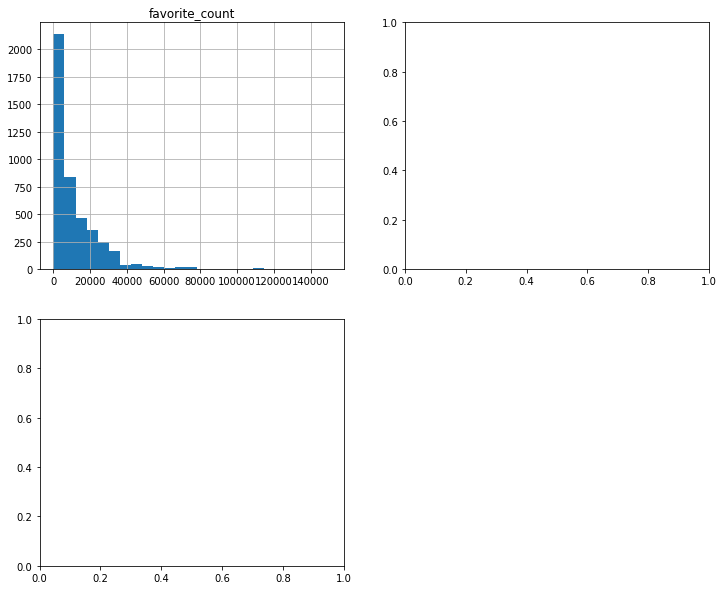

In [2755]:
# explore our dataset
We_Rate_Dogs.hist(figsize = (12,10), bins = 25)
plt.show()

According to the plot, we can conclude that the distribution of retweet_acount and favorite_account are skewed to the right while the distribution of dog ratings is skewed to the left.

### References:

WeRateDogs Twitter: https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor

Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html